# Import the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Dataset

In [2]:
(X_train , y_train) , (X_test , y_test) = fashion_mnist.load_data()

In [3]:
print(f'Train shape : {X_train.shape}')
print(f'Train label shape : {y_train.shape}')

print(f'Test shape : {X_test.shape}')
print(f'Test label shape : {y_test.shape}')

Train shape : (60000, 28, 28)
Train label shape : (60000,)
Test shape : (10000, 28, 28)
Test label shape : (10000,)


In [4]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [5]:
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [6]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

# Lets look some examples

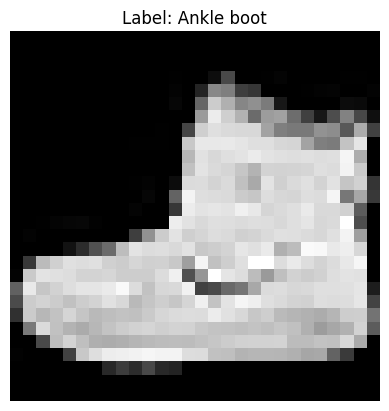

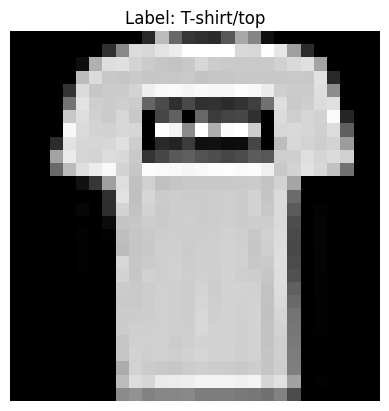

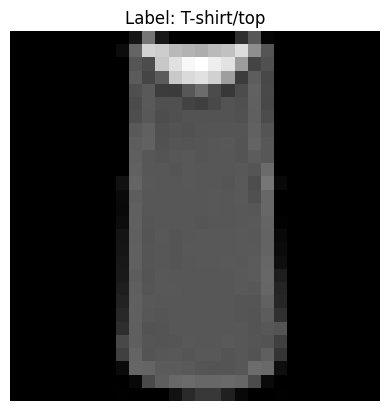

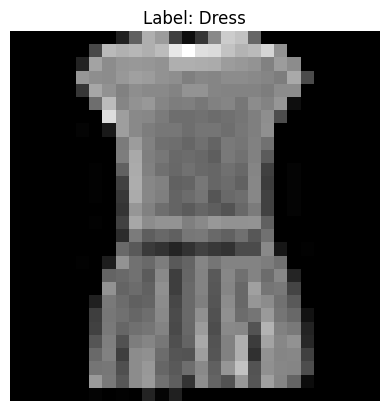

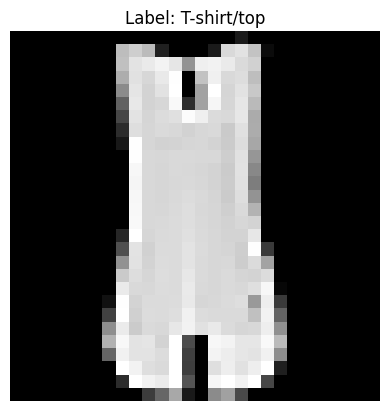

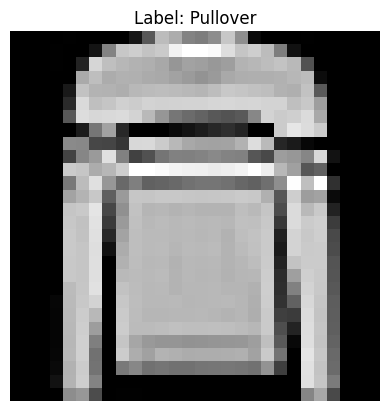

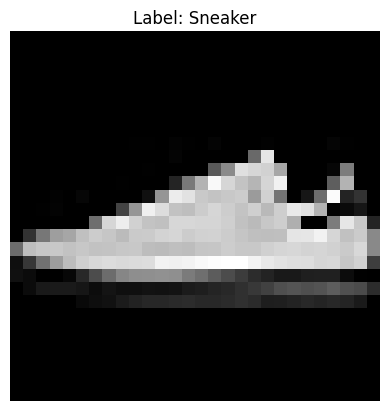

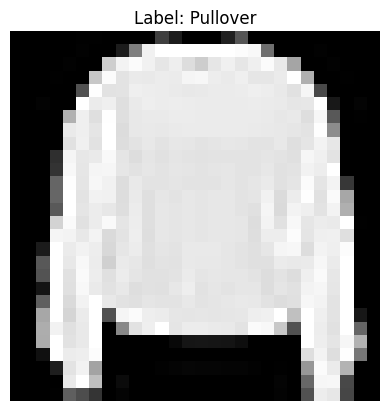

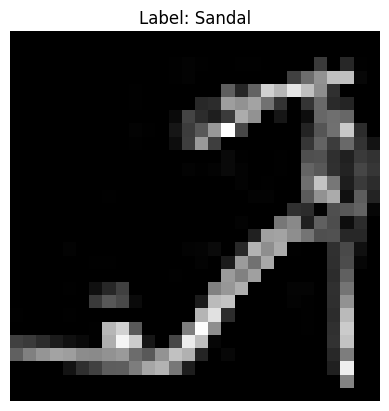

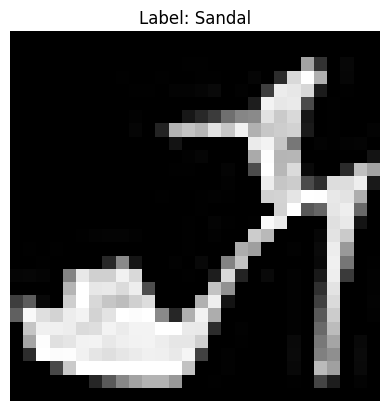

In [7]:
# print(y_train[:10])

for i in range(10):
    plt.imshow(X_train[i] , cmap='gray')
    plt.title(f'Label: {label_names[y_train[i]]}')
    plt.axis('off')
    plt.show()

# Normalize the data

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
y_train[0]

9

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
total_classes = len(set(y_train))
total_classes

10

# Modelling

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

## 1. ANN Model

In [14]:
from tensorflow.keras.layers import Dense, InputLayer , Rescaling , Dropout , Flatten
from tensorflow.keras import Sequential

ann_model = Sequential([
    InputLayer(input_shape=(28,28)),
    # Rescaling(1./255),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.1),
    
    Dense(total_classes, activation= 'softmax')
])

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [15]:
ann_model.compile(loss = 'sparse_categorical_crossentropy' , optimizer= "adam" , metrics = ['accuracy']) # OneHotEncoding yapsaydık categorical_crossentropy olacaktı. Ama LabelEncoding yaptık.

ann_model.fit(X_train, y_train, batch_size=32 , epochs = 10 , validation_split= 0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 2ms/step - loss: 0.6622 - accuracy: 0.7636 - val_loss: 0.4468 - val_accuracy: 0.8365
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4653 - accuracy: 0.8342 - val_loss: 0.3961 - val_accuracy: 0.8543
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4214 - accuracy: 0.8484 - val_loss: 0.3645 - val_accuracy: 0.8657
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3973 - accuracy: 0.8594 - val_loss: 0.3523 - val_accuracy: 0.8710
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3784 - accuracy: 0.8653 - val_loss: 0.3550 - val_accuracy: 0.8693
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3658 - accuracy: 0.8685 - val_loss: 0.3609 - val_accuracy: 0.8717
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3569 - accuracy: 0.8718 - val_loss: 0.3329 - val_accuracy:

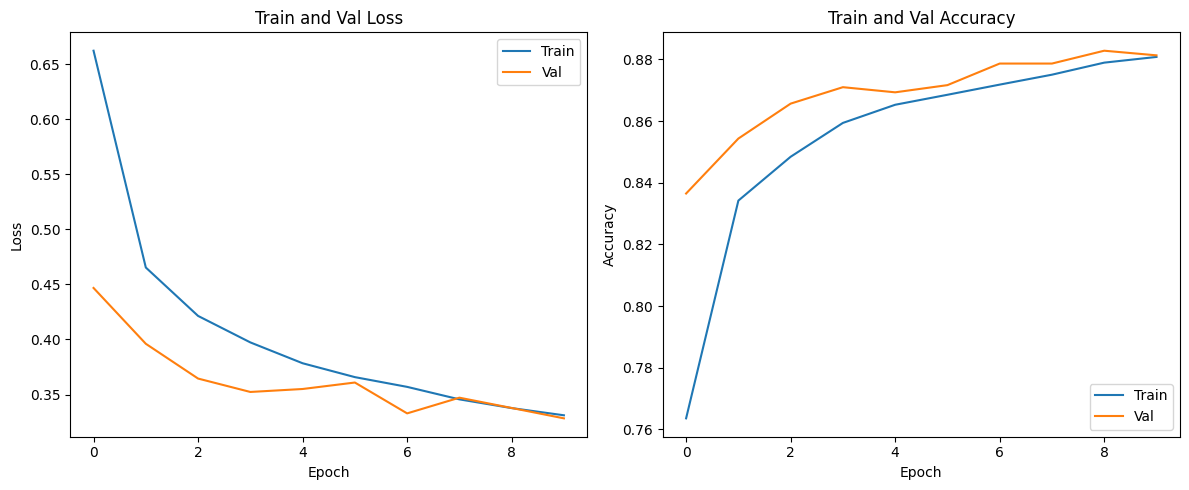

In [16]:
def visualize_model(model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(model.history.history['loss'])
    ax1.plot(model.history.history['val_loss'])
    ax1.set_title('Train and Val Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(['Train', 'Val'], loc='upper right')

    ax2.plot(model.history.history['accuracy'])
    ax2.plot(model.history.history['val_accuracy'])
    ax2.set_title('Train and Val Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend(['Train', 'Val'], loc='lower right')


    plt.tight_layout()
    plt.show()
        
visualize_model(ann_model)

In [17]:
ann_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8784


[0.3514445126056671, 0.8784000277519226]

## 2.Basic CNN

In [18]:
from tensorflow.keras.layers import Dense, Conv2D , MaxPooling2D , GlobalMaxPooling2D
from keras.models import Sequential

basic_cnn = Sequential([
    Conv2D(64 , (3,3) , padding = 'same' , activation = 'relu' , input_shape = (28,28,1) ),
    MaxPooling2D(2,2),
    Conv2D(64 , (3,3) , padding = 'same' ,  activation = 'relu'),
    MaxPooling2D(2,2),
    
    GlobalMaxPooling2D(),
    
    Dense(64 , activation = 'relu'),
    Dense(total_classes , activation = 'softmax')    
])

basic_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 global_max_pooling2d (Globa  (None, 64)               0         
 lMaxPooling2D)                                                  
                                                      

In [19]:
basic_cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# basic_cnn.fit(X_train.reshape(-1,28,28,1) , y_train , epochs = 20 , batch_size= 32 , validation_split= 0.1 )
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension to X_train
X_test = np.expand_dims(X_test, axis=-1)  # Add channel dimension to X_test

basic_cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 7s 2ms/step - loss: 0.7108 - accuracy: 0.7490 - val_loss: 0.4906 - val_accuracy: 0.8240
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4295 - accuracy: 0.8466 - val_loss: 0.4076 - val_accuracy: 0.8500
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3719 - accuracy: 0.8668 - val_loss: 0.3922 - val_accuracy: 0.8640
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3380 - accuracy: 0.8790 - val_loss: 0.3592 - val_accuracy: 0.8707
Epoch 5/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3155 - accuracy: 0.8868 - val_loss: 0.3292 - val_accuracy: 0.8810
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2982 - accuracy: 0.8925 - val_loss: 0.3288 - val_accuracy: 0.8838
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2828 - accuracy: 0.8972 - val_loss: 0.3073 - val_accuracy:

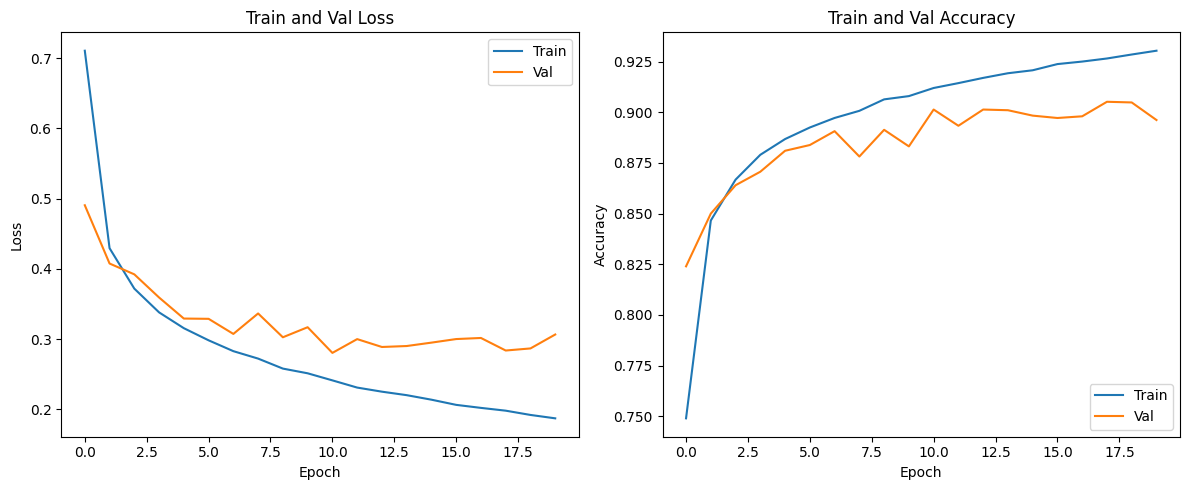

In [20]:
visualize_model(basic_cnn)

In [21]:
basic_cnn.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8981


[0.31826698780059814, 0.8981000185012817]

## Skip Connection CNN

## Transfer Learning

In [22]:
# Done.